# Code to reproduce manuscript figures
### Kristin Fullerton | krl4005@med.cornell.edu


In [22]:
# IMPORT FUNCTIONS
import pandas as pd
import pickle
import myokit.lib.plots as mp
from scipy.stats import spearmanr
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter
import numpy as np
from important_functions import get_torord_phys_data, add_scalebar, generate_alldata
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.pyplot as plt

##########################################################################################################################################################
# SET UP FIGURE PARAMETERS
plt.rcParams['font.size'] = 12 
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.constrained_layout.use'] = True

class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"

yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))

##########################################################################################################################################################
# LOAD DATA


data_path = '../new_ga_data/'
figures_path = '../new_ga_data/figures/'

all_trials =  generate_alldata(data_path, trials = ['trial3'])

fig2_data = all_trials[(all_trials['gen']==0) | (all_trials['gen']==72) | (all_trials['gen']==145)]
fig2_data = fig2_data[fig2_data['rrc']!=5.000000e+07] 
fig2_data = fig2_data[['gen', 'trial', 'fitness', 'rrc', 't', 'v', 'cai']]

#cond_data = pickle.load(open(data_path+'/cond_data.pkl', 'rb'))
#robust_data = pickle.load(open(data_path+'/robust_data.pkl', 'rb'))

best_data = all_trials[(all_trials['fitness']==0) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)]
best_data.reset_index(inplace=True)

#rrc_data = pd.read_csv(data_path+'/rrc_data.csv.bz2')
#sens_data = pd.read_csv(data_path+'/sens_opt.csv.bz2')
#sens_data_base = pd.read_csv(data_path+'/sens_baseline.csv.bz2')
#sens_data_grandi = pd.read_csv(data_path+'/sens_grandi.csv.bz2')



# Figure 2
**A genetic algorithm that optimizes for RRC while ensuring physiologic morphology**

C:\Users\Kristin\AppData\Local\Temp/ipykernel_17672/826846759.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_17672/826846759.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig2.png', trasparent=True)


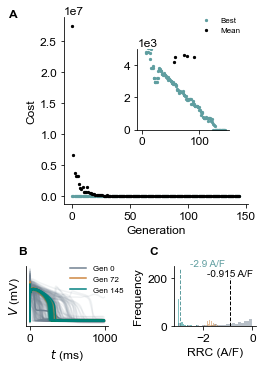

In [24]:
# SET UP FIGURE
fig = plt.figure(figsize = (3.5, 5)) 
gs = GridSpec(nrows=2, ncols=1, figure = fig, height_ratios=[1, 0.5]) 

sub4 = fig.add_subfigure(gs[0])
axs4= sub4.subplots()

sub5 = fig.add_subfigure(gs[1])
axs5 = sub5.subplots(1, 2)

##########################################################################################################################################################
# A) ERROR PLOT
axs4_in = axs4.inset_axes([0.4, 0.4, 0.5, 0.43])

for i in list(range(0, max(all_trials['trial'])+1)):

    d = all_trials[all_trials['trial']==i]
    bsts = []
    avgs = []

    for g in list(range(0, max(d['gen']))):
        d_gen = d[d['gen']==g]['fitness'].to_list()
        bsts.append(min(d_gen))
        avgs.append(np.mean(d_gen))

    axs4.scatter(list(range(0, max(d['gen']))), bsts, color = 'cadetblue', s=5)
    axs4.scatter(list(range(0, max(d['gen']))), avgs, color = 'black', s=5)
    axs4_in.scatter(list(range(0, max(d['gen']))), bsts, color = 'cadetblue', s=5)
    axs4_in.scatter(list(range(0, max(d['gen']))), avgs, color = 'black', s=5)

axs4.set_ylabel('Cost')
axs4.set_xlabel('Generation');
#axs4_in.set_ylim([-16000, 23000])
#axs4.indicate_inset_zoom(axs4_in, edgecolor="black", alpha = 1)
axs4_in.set_ylim([0, 5000])
axs4_in.legend(['Best', 'Mean'], loc='upper right', bbox_to_anchor = (1.2,1.5), frameon = False, fontsize=8)
axs4_in.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

##########################################################################################################################################################
# B) AP and C) RRC PLOTs
gens = [0, 72, 145]
colors = ['slategrey', 'peru', 'teal']
for g in list(range(0, len(gens))):
    #HISTOGRAM
    axs5[1].hist(-fig2_data[fig2_data['gen']==gens[g]]['rrc']*10, color = colors[g], bins = 25, label = str(gens[g]), alpha = 0.5) 

    for i in list(range(0, len(fig2_data[fig2_data['gen']==gens[g]]['gen']))):
        ind = fig2_data[fig2_data['gen']==gens[g]].sort_values('fitness').reset_index().iloc[i]
        
        # AP TRACES
        #if eval(ind['t']) != 50000000:
        axs5[0].plot(eval(ind['t']), eval(ind['v']), color = colors[g], alpha = 0.1)
        if i == len(fig2_data[fig2_data['gen']==gens[g]]['gen'])-1:
            axs5[0].plot(eval(ind['t']), eval(ind['v']), color = colors[g], label = 'Gen '+str(gens[g]))

axs5[0].set_ylabel('$V$ (mV)')
axs5[0].set_xlabel('$t$ (ms)')
axs5[0].tick_params(left=False)
axs5[0].tick_params(labelleft=False)
axs5[0].legend(frameon=False, loc = (0.5,0.5), fontsize=8)

axs5[1].set_ylabel('Frequency')
axs5[1].set_xlabel('RRC (A/F)')

# ANNOTATION
mean_rrc = np.mean(-fig2_data[fig2_data['gen']==gens[-1]]['rrc']*10)
axs5[1].plot([mean_rrc, mean_rrc], [0, 240], color = 'cadetblue', linestyle = 'dashed', linewidth= 1)
axs5[1].annotate(str(round(mean_rrc, 2))+' A/F', (-1.8, 250), ha='center', fontsize = 10, color = 'cadetblue')
axs5[1].plot([-0.915, -0.915], [0, 200], color = 'black', linestyle = 'dashed', linewidth= 1)
axs5[1].annotate('-0.915 A/F', (-0.915, 210), ha='center', fontsize = 10, color = 'black')

##########################################################################################################################################################
# LETTER LABELS
axs4.text(-0.3, 1, 'A', transform=axs4.transAxes, weight='bold')
axs5[0].text(-0.1, 1.2, 'B', transform=axs5[0].transAxes, weight='bold')
axs5[1].text(-0.3, 1.2, 'C', transform=axs5[1].transAxes, weight='bold')

##########################################################################################################################################################
# SAVE FIGURE
plt.savefig(figures_path+'fig2.pdf', trasparent=True)
plt.savefig(figures_path+'fig2.png', trasparent=True)

# Figure 3
**The best individuals found by the genetic algorithm are physiologic and allow for an 80% increase in RRC compared to baseline.**


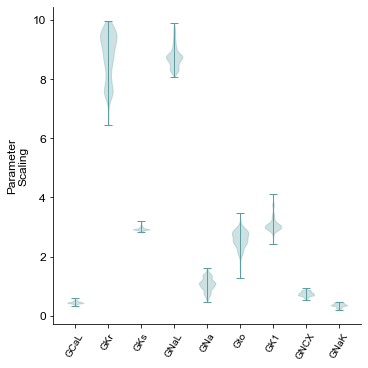

In [25]:
fig, axs1 = plt.subplots(1, figsize = (5,5), constrained_layout = True)

violin = axs1.violinplot(best_data.filter(like = 'multiplier'))
for vp in violin['bodies']:
    vp.set_facecolor('cadetblue')
    vp.set_edgecolor('cadetblue')

for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('cadetblue')
    vp.set_linewidth(1)

axs1.set_ylabel('Parameter\nScaling')
axs1.set_xticks(list(range(1, 10)))
axs1.set_xticklabels(['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK'], rotation = 60, fontsize = 10);

C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/1000674605.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs1[1].set_xticklabels([0, 250, 500, 750], fontsize = 10);
C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/1000674605.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig3.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/1000674605.py:129: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig3.png', trasparent=True, dpi = 600)


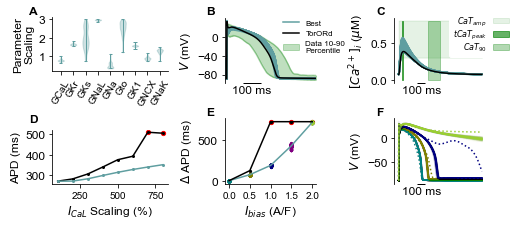

In [6]:
# SET UP FIGURE
fig = plt.figure(figsize = (7, 3)) 
gs = GridSpec(nrows=1, ncols=2, figure = fig,  width_ratios=[1, 2])

sub1 = fig.add_subfigure(gs[0])
axs1= sub1.subplots(2)

sub2 = fig.add_subfigure(gs[1])
axs= sub2.subplots(2, 2)

#########################################################################################################################
# A) VIOLIN PLOT
violin = axs1[0].violinplot(best_data.filter(like = 'multiplier'))
for vp in violin['bodies']:
    vp.set_facecolor('cadetblue')
    vp.set_edgecolor('cadetblue')

for partname in ('cbars','cmins','cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor('cadetblue')
    vp.set_linewidth(1)

axs1[0].set_ylabel('Parameter\nScaling')
axs1[0].set_xticks(list(range(1, 10)))
axs1[0].set_xticklabels(['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK'], rotation = 60, fontsize = 10);


#########################################################################################################################
# B) AP AND C) CAT TRACES
t, v_10, v_90 = get_torord_phys_data(data_path)
axs[0, 0].plot(t, v_10, color = 'green', alpha = 0.25)
axs[0, 0].plot(t, v_90, color = 'green', alpha = 0.25)
axs[0, 0].fill_between(t, v_10, v_90, color='green', alpha = 0.25, label = 'Data 10-90\nPercentile')

for i in list(range(0, len(best_data['gen']))):
    if i == 0:
        axs[0, 0].plot(eval(best_data['t'][i]),eval(best_data['v'][i]), color = 'cadetblue', label = 'Best')
    else:
        axs[0, 0].plot(eval(best_data['t'][i]),eval(best_data['v'][i]), color = 'cadetblue')
    axs[0, 1].plot(eval(best_data['t'][i]), np.array(eval(best_data['cai'][i]))*1000, color = 'cadetblue')

axs[0, 0].plot(cond_data['BM']['dat']['engine.time'], cond_data['BM']['dat']['membrane.v'], color = 'black', label = 'TorORd')
axs[0, 1].plot(cond_data['BM']['dat']['engine.time'], np.array(cond_data['BM']['dat']['intracellular_ions.cai'])*1000, color = 'black')

axs[0, 0].set_ylabel('$V$ (mV)')
axs[0, 0].set_yticks(range(-80, 40, 40))
axs[0, 0].set_xlim([-10, 500])
axs[0, 0].legend(frameon = False, fontsize = 8, loc = (0.6, 0.4))

axs[0, 1].set_ylabel('$[Ca^{2+}]_i$ ($\mu$M)')
axs[0, 1].fill_between(cond_data['BM']['dat']['engine.time'], [3E-4*1000]*len(cond_data['BM']['dat']['engine.time']), [8E-4*1000]*len(cond_data['BM']['dat']['engine.time']), color='green', alpha = 0.1, label = '$CaT_{amp}$')
axs[0, 1].fill_between(cond_data['BM']['dat']['engine.time'], 0.0008*1000, 0, where = (np.array(cond_data['BM']['dat']['engine.time'].tolist())>40) &  (np.array(cond_data['BM']['dat']['engine.time'].tolist())<60), color='green', alpha = 0.6, label = '$tCaT_{peak}$')
axs[0, 1].fill_between(cond_data['BM']['dat']['engine.time'], 0.0008*1000, 0, where = (np.array(cond_data['BM']['dat']['engine.time'].tolist())>350) &  (np.array(cond_data['BM']['dat']['engine.time'].tolist())<500), color='green', alpha = 0.3, label = '$CaT_{90}$')
axs[0, 1].legend(frameon = True, markerfirst=False, edgecolor = 'white', facecolor = 'white', framealpha=1, fontsize = 8, labelspacing = 0, loc = (0.6, 0.4))
#axs[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

#########################################################################################################################

# D) ICAL PURTURBATION
ical_df = robust_data[robust_data['conductance']=='i_cal_pca_multiplier']
axs1[1].plot(ical_df[ical_df['type']=='torord']['value']*100, ical_df[ical_df['type']=='torord']['apd90'].tolist(), label = 'torord', marker = 'o', color = 'black', markersize = 2)
axs1[1].plot(ical_df[ical_df['type']=='optimized']['value']*100, ical_df[ical_df['type']=='optimized']['apd90'].tolist(), label = 'optimized', marker = 'o', color = 'cadetblue', markersize = 2)
axs1[1].set_xlabel('$I_{CaL}$ Scaling (%)')
axs1[1].set_ylabel('APD (ms)')
axs1[1].set_xticklabels([0, 250, 500, 750], fontsize = 10);


for i in list(range(0, len(ical_df))):
    if ical_df['result'][i] == 1:
        axs1[1].scatter(ical_df['value'][i]*100, ical_df['apd90'][i], color = 'red', s = 18)

#########################################################################################################################
# E) RRC TRACES
stims = [0, 0.05, 0.1, 0.15, 0.2]
cols = ['teal', 'olive', 'navy', 'purple', 'yellowgreen']
means = []
for i in list(range(0, len(stims))):
    #BASELINE DATA
    base_data = rrc_data['delapd_'+str(stims[i])][len(rrc_data)-1]
    if base_data > 600:
        axs[1,0].scatter(i, base_data, color = 'red', s = 18)

    axs[1,0].scatter(i, base_data, color = 'black', s = 5)
    
    #OPTIMIZED DATA
    y_data = rrc_data['delapd_'+str(stims[i])][0:len(rrc_data)-1].tolist()
    means.append(np.mean(y_data))
    axs[1,0].scatter([i]*len(y_data), y_data, color = cols[i], s = 5)

axs[1,0].plot(list(range(0, len(means))), means, color = 'cadetblue', label = 'Best')
axs[1,0].plot(list(range(0, len(means))), rrc_data.filter(like='delapd').iloc[len(rrc_data)-1].tolist(), color = 'black', label = 'ToR-ORd')

axs[1,0].set_xticks(list(range(0, len(stims))))
axs[1,0].set_xticklabels(np.array(stims)*10, fontsize = 10);
axs[1,0].set_ylabel('$\Delta$ APD (ms)')
axs[1,0].set_xlabel('$I_{bias}$ (A/F)')

#########################################################################################################################
# F) RRC AP TRACES
for s in list(range(0,len(stims))):

    if stims[s] == 0.15:
        #do nothing
        axs[1,1].plot()
    else:
        for i in list(range(0, len(rrc_data['i_cal_pca_multiplier'])-1)):
            axs[1,1].plot(eval(rrc_data['t_'+str(stims[s])][i])[0], eval(rrc_data['v_'+str(stims[s])][i])[0], color = cols[s], alpha = 0.02)

        axs[1,1].plot(eval(rrc_data['t_'+str(stims[s])][len(rrc_data)-1])[0], eval(rrc_data['v_'+str(stims[s])][len(rrc_data)-1])[0], color = cols[s], label = str(stims[s])+'A/F', linestyle = 'dotted')
    
axs[1,1].set_ylabel('$V$ (mV)')

#########################################################################################################################
# FORMAT X AXIS
add_scalebar(axs, [[0,0], [1,1], [0,1]], y_pos = -0.3)

#########################################################################################################################
# LETTER LABELS
axs1[0].text(-0.2, 1.05, 'A', transform=axs1[0].transAxes, weight='bold')
axs[0,0].text(-0.2, 1.05, 'B', transform=axs[0,0].transAxes, weight='bold')
axs[0,1].text(-0.2, 1.05, 'C', transform=axs[0,1].transAxes, weight='bold')
axs1[1].text(-0.2, 1.15, 'D', transform=axs1[1].transAxes, weight='bold')
axs[1,0].text(-0.2, 1.05, 'E', transform=axs[1,0].transAxes, weight='bold')
axs[1,1].text(-0.2, 1.05, 'F', transform=axs[1,1].transAxes, weight='bold')

#########################################################################################################################
# SAVE FIGURE
plt.savefig(figures_path+'fig3.pdf', trasparent=True)
plt.savefig(figures_path+'fig3.png', trasparent=True, dpi = 600)

# Figure 4
**GA optimization is most sensitive to IKR, IK1, ICaL, and INCX but INaL plays a key role in later generations to balance high RRC and physiologic APD.**

Behind IKr, INaL contributes to APD the most!



C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/2449440158.py:116: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig4.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/2449440158.py:117: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'fig4.png', dpi = 300, trasparent=True)


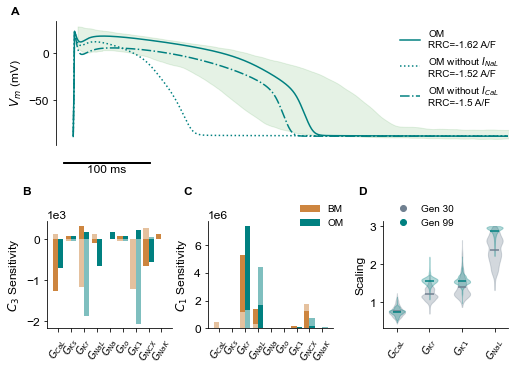

In [23]:
# SET UP FIGURE
fig = plt.figure(figsize = (7, 5)) 
gs = GridSpec(nrows=2, ncols = 1, figure = fig) #height_ratios=[2, 1], width_ratios=[2, 1]

sub1 = fig.add_subfigure(gs[0])
axs1= sub1.subplots()

sub2 = fig.add_subfigure(gs[1])
axs2= sub2.subplots(1, 3)

##########################################################################
# A) AP TRACES
t, v_10, v_90 = get_torord_phys_data(data_path)
axs1.fill_between(t, v_10, v_90, color='green', alpha = 0.1)
axs1.plot(cond_data['OM']['data'][0]['t_rrc'], cond_data['OM']['data'][0]['v_rrc'], label = 'OM\nRRC=-'+str(round(cond_data['OM']['RRC']*10,2))+ ' A/F', color ='teal')
axs1.plot(cond_data['OM1']['data'][0]['t_rrc'], cond_data['OM1']['data'][0]['v_rrc'], label = 'OM without $I_{NaL}$\nRRC=-'+str(round(cond_data['OM1']['RRC']*10,2))+ ' A/F', linestyle = 'dotted', color ='teal')
axs1.plot(cond_data['OM3']['data'][0]['t_rrc'], cond_data['OM3']['data'][0]['v_rrc'], label = 'OM without $I_{CaL}$\nRRC=-'+str(round(cond_data['OM3']['RRC']*10,2))+ ' A/F', linestyle = 'dashdot', color ='teal')
axs1.set_xlim([-20, 500])
axs1.legend(frameon = False, fontsize = 10)
axs1.set_ylabel('$V_m$ (mV)')
add_scalebar(axs1, 0, y_pos=-0.3)

##########################################################################################################

# B) Local Sensitivity Analysis
conductance_labels = ['$G_{CaL}$', '$G_{Ks}$', '$G_{Kr}$', '$G_{NaL}$', '$G_{Na}$', '$G_{to}$', '$G_{K1}$', '$G_{NCX}$', '$G_{NaK}$'] 

data_type_1 = ['BM', 'OM']
data_type = ['rrc_error', 'morph_error'] 
labels = ['$C_3$', '$C_1$'] 
colors = ['peru', 'teal']
x_axis = [0.3, 1, 1.5, 2, 2.5, 3]

for y in list(range(0, len(data_type_1))):
    for d in list(range(0, len(data_type))):

        if data_type_1[y] == 'BM':
            sensitivities = sens_data_base.filter([data_type[d]+'_'+str(pur) for pur in x_axis])
        if data_type_1[y] == 'OM':
            sensitivities = sens_data.filter([data_type[d]+'_'+str(pur) for pur in x_axis])

        enhance_sensitivities = []
        block_sensitivities = []

        for i in list(range(0, len(sensitivities[sensitivities.columns[0]]))):
            y_axis = sensitivities.loc[i].to_list()
            if data_type[d]=='apd':
                # use slope as a measure of sensitivity for apd90
                y_axis = [np.mean(eval(l)) for l in y_axis]
                block_sensitivities.append(-(y_axis[1]-y_axis[0])/(log10(x_axis[1])-log10(x_axis[0])))
                enhance_sensitivities.append((y_axis[1]-y_axis[5])/(log10(x_axis[1])-log10(x_axis[5])))
            else:
                # Use change in  C1, C2, and C3 metrics as measure of sensitivity for features, morphology, and RRC, respecitively. 
                if data_type[d]=='morph_error':
                    block_sensitivities.append(abs(y_axis[1]-y_axis[0]))
                    enhance_sensitivities.append(abs(y_axis[1]-y_axis[5]))
                else:
                    block_sensitivities.append(y_axis[1]-y_axis[0])
                    enhance_sensitivities.append(y_axis[1]-y_axis[5])
        
        for p in list(range(0, len(enhance_sensitivities))):
            if y == 0:
                x_pos = p-0.2
            if y == 1:
                x_pos = p+0.2
            
            if p == 0:
                if d !=0 and enhance_sensitivities[p] > block_sensitivities[p]:
                    axs2[d].bar(x_pos, block_sensitivities[p], color = colors[y], alpha = 0.5, width = 0.4)
                    axs2[d].bar(x_pos, enhance_sensitivities[p], bottom = block_sensitivities[p], color = colors[y], alpha = 1, width = 0.4, label = data_type_1[y])
                else:
                    axs2[d].bar(x_pos, block_sensitivities[p], color = colors[y], alpha = 0.5, width = 0.4)
                    axs2[d].bar(x_pos, enhance_sensitivities[p], color = colors[y], alpha = 1, width = 0.4, label = data_type_1[y])
            else:
                if d !=0 and enhance_sensitivities[p] > block_sensitivities[p]:
                    axs2[d].bar(x_pos, block_sensitivities[p], color = colors[y], alpha = 0.5, width = 0.4)
                    axs2[d].bar(x_pos, enhance_sensitivities[p], bottom = block_sensitivities[p], color = colors[y], alpha = 1, width = 0.4)
                else:
                    axs2[d].bar(x_pos, block_sensitivities[p], color = colors[y], alpha = 0.5, width = 0.4)
                    axs2[d].bar(x_pos, enhance_sensitivities[p], color = colors[y], alpha = 1, width = 0.4)

        axs2[d].set_xticks(list(range(0, 9)))
        axs2[d].set_xticklabels(conductance_labels, rotation = 60, fontname="Arial", fontsize= 10)
        axs2[d].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        axs2[d].set_ylabel(labels[d]+' Sensitivity')

    axs2[1].legend(loc=(0.7,0.9), frameon = False, fontsize = 10)


##########################################################################
# D) VIOLIN PLOT
gens = [30, 99]
colors = ['slategrey', 'teal']
for g in list(range(0, len(gens))):
    violin = axs2[2].violinplot(all_trials[all_trials['gen']==gens[g]].sort_values('fitness').reset_index().filter(['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_k1_multiplier', 'i_nal_multiplier']), showextrema=False, showmeans=True)
    for vp in violin['bodies']:
        vp.set_facecolor(colors[g])
        vp.set_edgecolor(colors[g])
    violin['cmeans'].set_edgecolor(colors[g])

axs2[2].set_ylabel('Scaling')
axs2[2].set_xticks(np.arange(1, len(all_trials[all_trials['gen']==gens[g]].sort_values('fitness').reset_index().filter(['i_cal_pca_multiplier', 'i_kr_multiplier', 'i_k1_multiplier', 'i_nal_multiplier']).iloc[0].to_list())+1, 1))
axs2[2].set_xticklabels(['$G_{CaL}$', '$G_{Kr}$', '$G_{K1}$', '$G_{NaL}$'], rotation = 60, fontname="Arial", fontsize = 10);
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors]
axs2[2].legend(markers, ['Gen 30', 'Gen 99'], numpoints=1, frameon=False, loc = (0.05,0.9), fontsize=10)

##########################################################################################################################################################
# LETTER LABELS
axs1.text(-0.1, 1.05, 'A', transform=axs1.transAxes, weight='bold')
axs2[0].text(-0.2, 1.25, 'B', transform=axs2[0].transAxes, weight='bold')
axs2[1].text(-0.2, 1.25, 'C', transform=axs2[1].transAxes, weight='bold')
axs2[2].text(-0.2, 1.25, 'D', transform=axs2[2].transAxes, weight='bold')

##########################################################################################################
# SAVE FIGURE
plt.savefig(figures_path+'fig4.pdf', trasparent=True)
plt.savefig(figures_path+'fig4.png', dpi = 300, trasparent=True)


# Figure S2
**Correlations between specific ion-channels are present in a group of cells with high RRC but not in a group with low RRC.**


C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/684214206.py:102: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figS2.pdf', trasparent=True)
C:\Users\Kristin\AppData\Local\Temp/ipykernel_14920/684214206.py:103: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figures_path+'figS2.png', trasparent=True, dpi = 300)


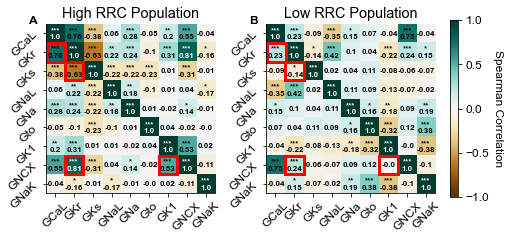

In [13]:
# SET UP FIGURE
fig, axs1 = plt.subplots(1,2, figsize = (7,5), constrained_layout = True)

######################################################################################
# A) HIGH RRC CORR MATRIX
stat = spearmanr
color_map = 'BrBG'
cond_labels = ['GCaL', 'GKr', 'GKs', 'GNaL', 'GNa', 'Gto', 'GK1', 'GNCX', 'GNaK']

low_rrc_data = all_trials[(all_trials['rrc_error']<2800) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)].filter(like = 'multiplier')
low_corr = low_rrc_data.corr(method = 'spearman')
low_pval = low_rrc_data.corr(method=lambda x, y: stat(x, y)[1]) - np.eye(*low_corr.shape)
im = axs1[0].imshow(low_corr, cmap = color_map, vmin=-1, vmax=1)

# Show all ticks and label them with the respective list entries.
axs1[0].set_xticks(np.arange(len(cond_labels)))
axs1[0].set_xticklabels(cond_labels, rotation = 45);
axs1[0].set_yticks(np.arange(len(cond_labels)))
axs1[0].set_yticklabels(cond_labels, rotation = 45);
axs1[0].set_title('High RRC Population')

texts = []
for i in range(low_corr.shape[0]):
    for j in range(low_corr.shape[1]):
        t = str(round(low_corr.iloc[i,j], 2))
        pval = low_pval.iloc[i,j]
        p = ''
        c = 'black'
        if pval < 0.05: 
            p = '*\n'
        if pval < 0.01: 
            p = '**\n'
        if pval < 0.001: 
            p = '***\n'
        if low_corr.iloc[i,j]>0.8 or low_corr.iloc[i,j]<-0.8:
            c = 'white'
        text = im.axes.text(j, i, p+t, color = c, ha="center", va="center", fontsize=8, fontweight="bold")
        texts.append(text)

######################################################################################
# B) LOW RRC CORR MATRIX
high_rrc_data = all_trials[(all_trials['rrc_error']>5200) & (all_trials['total_morph_error']==0) & (all_trials['total_feature_error']==0)].filter(like = 'multiplier')
high_rrc_data = high_rrc_data[high_rrc_data['i_k1_multiplier']<0.5] #This is here to remove an IK1 outlier which is in the last row of the dataframe
high_corr = high_rrc_data.corr(method = 'spearman')
high_pval = high_rrc_data.corr(method=lambda x, y: stat(x, y)[1]) - np.eye(*high_corr.shape)
im = axs1[1].imshow(high_corr, cmap = color_map, vmin=-1, vmax=1)

# Show all ticks and label them with the respective list entries.
axs1[1].set_xticks(np.arange(len(cond_labels)))
axs1[1].set_xticklabels(cond_labels, rotation = 45, fontname="Arial");
axs1[1].set_yticks(np.arange(len(cond_labels)))
axs1[1].set_yticklabels(cond_labels, rotation = 45, fontname="Arial");
axs1[1].set_title('Low RRC Population')

# Create colorbar
cbar = axs1[1].figure.colorbar(im, ax=axs1[1], shrink=0.5)
cbar.ax.set_ylabel('Spearman Correlation', rotation=-90, va="bottom")

texts = []
for i in range(high_corr.shape[0]):
    for j in range(high_corr.shape[1]):
        t = str(round(high_corr.iloc[i,j], 2))
        pval = high_pval.iloc[i,j]
        p = ''
        c = 'black'
        if pval < 0.05: 
            p = '*\n'
        if pval < 0.01: 
            p = '**\n'
        if pval < 0.001: 
            p = '***\n'
        if high_corr.iloc[i,j]>0.8 or high_corr.iloc[i,j]<-0.8:
            c = 'white'
        text = im.axes.text(j, i, p+t, color = c, fontsize=8, fontweight="bold", ha="center", va="center")
        texts.append(text)

######################################################################################
# ADD RECTANGLES
# IKr and ICaL
axs1[0].add_patch(Rectangle((-0.46, 0.5), 1, 1, fill=False, edgecolor='red', lw=3))
axs1[1].add_patch(Rectangle((-0.46, 0.5), 1, 1, fill=False, edgecolor='red', lw=3))

# IKr and IKs
axs1[0].add_patch(Rectangle((0.5, 1.5), 1, 1, fill=False, edgecolor='red', lw=3))
axs1[1].add_patch(Rectangle((0.5, 1.5), 1, 1, fill=False, edgecolor='red', lw=3))

# IKr and NCX; 
axs1[0].add_patch(Rectangle((0.5, 6.5), 1, 1, fill=False, edgecolor='red', lw=3))
axs1[1].add_patch(Rectangle((0.5, 6.5), 1, 1, fill=False, edgecolor='red', lw=3))

#IK1 and NCX; 
axs1[0].add_patch(Rectangle((5.5, 6.5), 1, 1, fill=False, edgecolor='red', lw=3))
axs1[1].add_patch(Rectangle((5.5, 6.5), 1, 1, fill=False, edgecolor='red', lw=3))

######################################################################################
# LETTER LABELS
axs1[0].text(-0.1, 1, 'A', transform=axs1[0].transAxes, weight='bold')
axs1[1].text(-0.1, 1, 'B', transform=axs1[1].transAxes, weight='bold')

######################################################################################
# SAVE FIGURE
plt.savefig(figures_path+'figS2.pdf', trasparent=True)
plt.savefig(figures_path+'figS2.png', trasparent=True, dpi = 300)
